In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

## Exercise 1 - Simple FFT

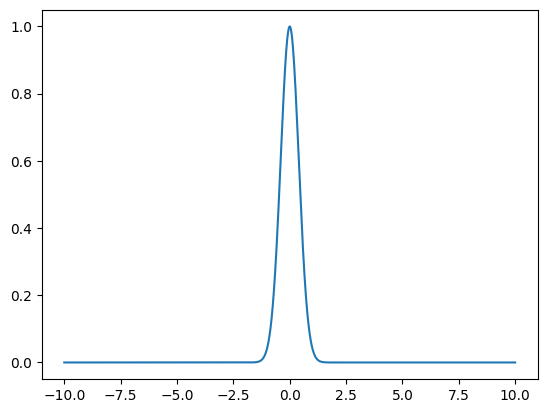

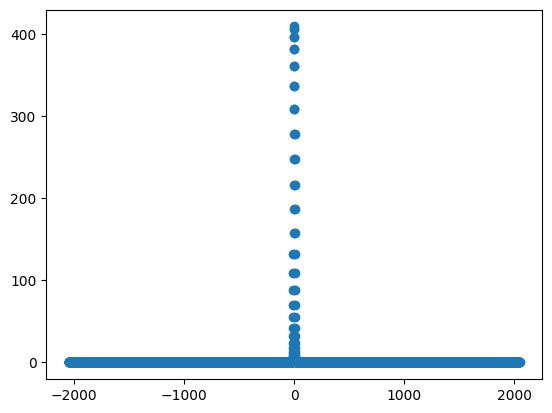

In [27]:
# using sc.fft

def f(x):
    return np.exp(-np.pi * x**2)

n_segments = 2**13
# FFT works best with 2**n segments
x = np.linspace(-10, 10, n_segments)
# plt.xlim([-5, 5])
fx = f(x)

plt.plot(x, fx)
plt.show()
fk = sc.fft.fft(
    fx,
    # norm = 'ortho'
)
k = sc.fft.fftfreq(n_segments, 2/n_segments)
plt.scatter(k, np.abs(fk))
# plt.xlim([-5, 5])
plt.show()

## Exercise 2 - signal analysis

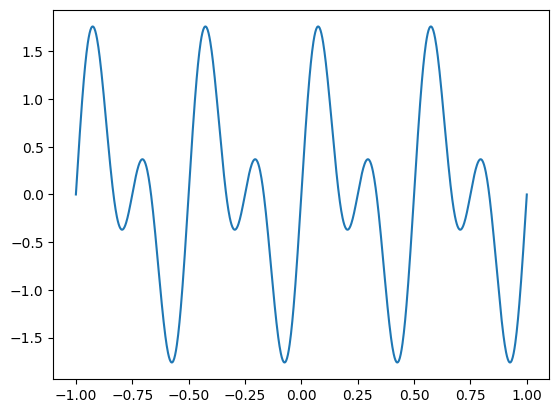

1024 1024


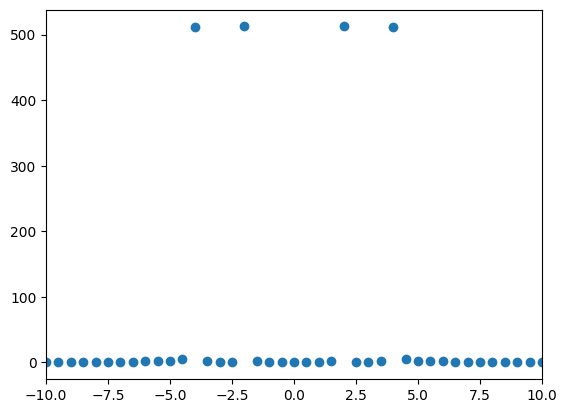

In [16]:
def signal(x, A=1, B=1):
    return A * np.sin(2 * np.pi * 2 * x) + B * np.sin(2 * np.pi * 4 * x)

n_segments = 2**10

domain = [-1, 1]
x = np.linspace(domain[0], domain[1], n_segments)

fx = signal(x)
plt.plot(x, fx)
plt.show()

## decompose signal
fk = sc.fft.fft(fx)
# fk = np.fft.fftshift(fk)
k = sc.fft.fftfreq(n_segments, 2/n_segments)
print(k.size, fk.size)
plt.xlim([-10, 10])
plt.scatter(k, np.abs(fk))
# plt.plot(np.abs(fk))
plt.show()

## Exercise 3 - Gibbs phenomenon

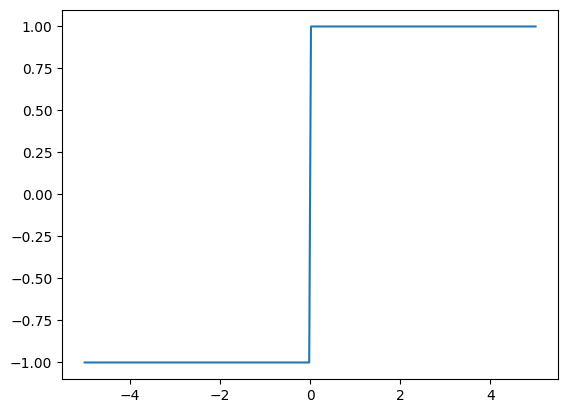

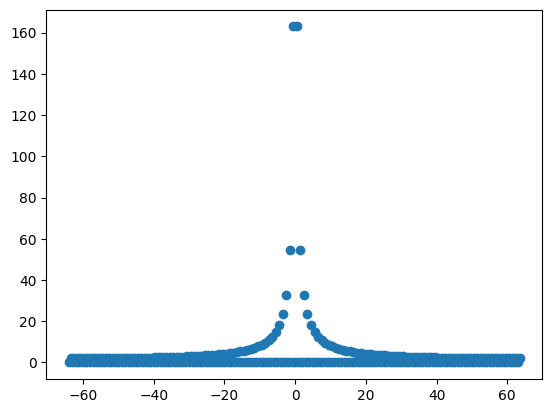

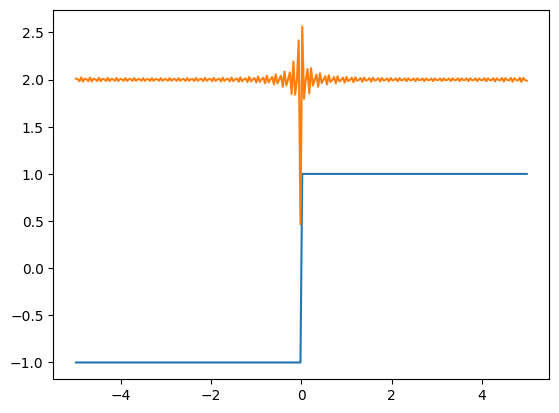

In [43]:
def step_function(x, L=1):
    def heaviside(x):
        ret = np.zeros_like(x)
        ret[x >= 0] = 1
        return ret
    return 2 * heaviside(x / L) - 1

n_segments = 2**8
length = 5
x = np.linspace(-length, length, n_segments)
fx = step_function(x, length)
plt.plot(x, fx)
plt.show()

# fourier space
fk = sc.fft.fft(fx)
k = sc.fft.fftfreq(n_segments, 2/n_segments)
plt.scatter(k, np.abs(fk))
plt.show()

# reconstruct signal
fx_reconstructed = np.zeros_like(fk)
for i in range(fx_reconstructed.size):
    fx_reconstructed[i] = np.sum(
        fk * np.exp(1j * k * x[i])
    ) * 2 / n_segments

fx_reconstructed_easy = sc.fft.ifft(fk)
plt.plot(x, fx_reconstructed_easy)
plt.plot(x, np.abs(fx_reconstructed))
plt.show()


## Exercise 4 - derivatives

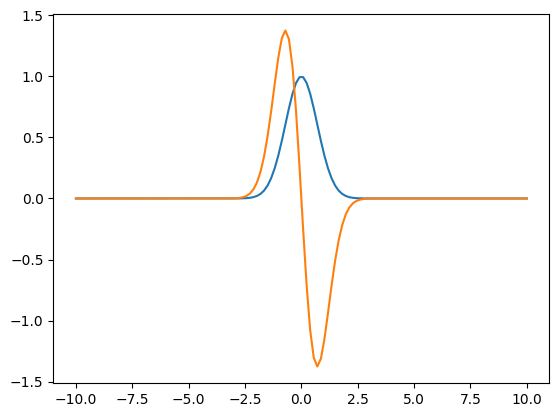

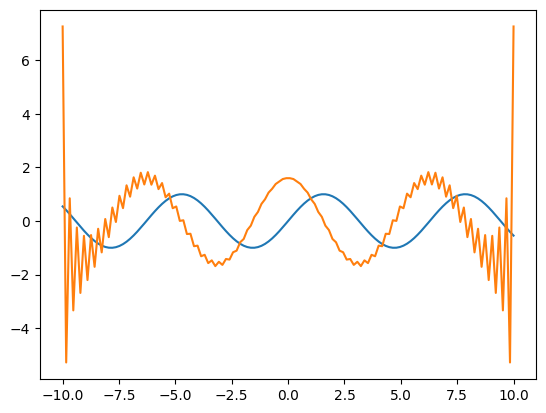

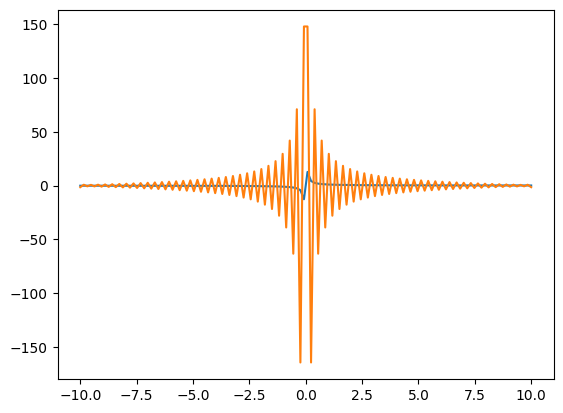

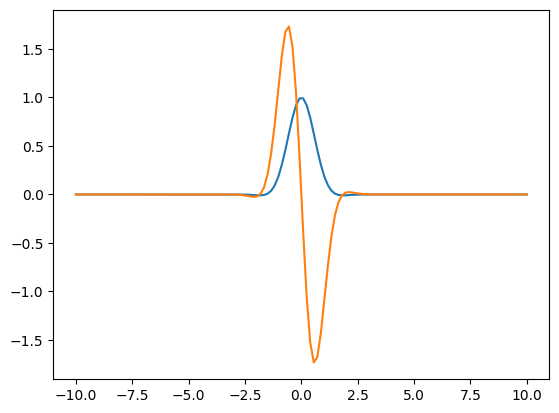

In [ ]:
def f1(x):
    return np.exp(-x**2)

def f2(x):
    return np.sin(x)

def f3(x):
    return 1/x

def f4(x):
    return np.cos(x) * np.exp(-x**2)


def fft_derivative(f:callable):
    def derivative(x):
        fk = sc.fft.fft(f(x))
        k = sc.fft.fftfreq(x.size, 2/x.size)
        df_dk = 1j * k * fk
        df_dx = sc.fft.ifft(df_dk)
        return df_dx
    return derivative

n_segments = 2**7
x = np.linspace(-10, 10, n_segments)


f1x = f1(x)
df1_dx = fft_derivative(f1)(x)
plot = plt.plot(x, f1x)
plot = plt.plot(x, df1_dx)
plt.show()

f2x = f2(x)
df2_dx = fft_derivative(f2)(x)
plot = plt.plot(x, f2x)
plot = plt.plot(x, df2_dx)
plt.show()

f3x = f3(x)
df3_dx = fft_derivative(f3)(x)
plot = plt.plot(x, f3x)
plot = plt.plot(x, df3_dx)
plt.show()

f4x = f4(x)
df4_dx = fft_derivative(f4)(x)
plot = plt.plot(x, f4x)
plot = plt.plot(x, df4_dx)
plt.show()